# Crawl4AI: Advanced Web Crawling and Data Extraction

Welcome to this interactive notebook showcasing Crawl4AI, an advanced asynchronous web crawling and data extraction library.

- GitHub Repository: [https://github.com/unclecode/crawl4ai](https://github.com/unclecode/crawl4ai)
- Twitter: [@unclecode](https://twitter.com/unclecode)
- Website: [https://crawl4ai.com](https://crawl4ai.com)

Let's explore the powerful features of Crawl4AI!

- https://discuss.pytorch.kr/t/crawl4ai-llm-ai-crawler/5282

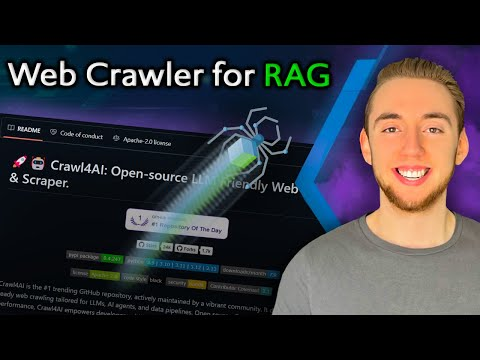

In [ ]:
# prompt: 유튜브 동영상열기 2줄
# https://www.youtube.com/watch?v=JWfNLF_g_V0
from IPython.display import YouTubeVideo
YouTubeVideo('JWfNLF_g_V0')

## Installation

First, let's install Crawl4AI from GitHub:

In [1]:
%%capture
!pip install -U crawl4ai
!pip install nest-asyncio
!playwright install chrome

Run the following update if you encounter Playwright installation warnings for missing packages and libraries.

In [2]:
!playwright install-deps

Installing dependencies...
Get:1 https://dl.google.com/linux/chrome/deb stable InRelease [1,825 B]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:4 https://dl.google.com/linux/chrome/deb stable/main amd64 Packages [1,213 B]
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 3,038 B in 2s (1,255 B/s)
Reading package lists... Done
W: Skipping acquire of configured file 'ma

If the above command did not solve your issue, try the one below to update the libraries explicitly.

In [ ]:
%%capture
!apt-get install -y \
    libwoff1 \
    libgstreamer1.0-0 \
    gstreamer1.0-gl \
    gstreamer1.0-plugins-base \
    gstreamer1.0-plugins-good \
    libavif13 \
    libharfbuzz-icu0 \
    libenchant-2-2 \
    libsecret-1-0 \
    libhyphen0 \
    libmanette-0.2-0
!apt-get install -y gstreamer1.0-plugins-b
!playwright install chrome

Now, let's import the necessary libraries:

In [ ]:
import asyncio
import nest_asyncio
from crawl4ai import AsyncWebCrawler, CacheMode, BrowserConfig, CrawlerRunConfig
from crawl4ai.extraction_strategy import JsonCssExtractionStrategy, LLMExtractionStrategy
import json
import time
from pydantic import BaseModel, Field

nest_asyncio.apply()

## Basic Usage

Let's start with a simple crawl example:

In [ ]:
%%capture
!playwright install chromium  # Change 'chrome' to 'chromium'
!playwright install-deps chromium # Update dependencies for chromium as well

In [ ]:
async def simple_crawl():
    async with AsyncWebCrawler(verbose=True) as crawler:
        url = 'https://www.jobplanet.co.kr/job'
        url = 'https://www.jobplanet.co.kr/search?query=%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0'
        # url = "https://www.nbcnews.com/business"
        result = await crawler.arun(url=url)
        print(len(result.markdown))
await simple_crawl()

[INIT].... → Crawl4AI 0.4.248
[FETCH]... ↓ https://www.jobplanet.co.kr/search?query=%EB%B9%85... | Status: True | Time: 2.30s
[SCRAPE].. ◆ Processed https://www.jobplanet.co.kr/search?query=%EB%B9%85... | Time: 91ms
[COMPLETE] ● https://www.jobplanet.co.kr/search?query=%EB%B9%85... | Status: True | Total: 2.44s
16758


In [ ]:
import asyncio
from crawl4ai import AsyncWebCrawler
from bs4 import BeautifulSoup  # HTML 파싱을 위해 사용

async def extract_links(url):
    """주어진 URL에서 모든 내부 링크를 추출"""
    async with AsyncWebCrawler(verbose=True) as crawler:
        result = await crawler.arun(url=url)
        soup = BeautifulSoup(result.html, "html.parser")  # HTML 파싱

        links = set()
        for a_tag in soup.find_all("a", href=True):  # 모든 <a> 태그에서 href 속성 추출
            link = a_tag["href"]
            if link.startswith("/"):  # 내부 링크라면 전체 URL로 변환
                link = f"https://www.jobplanet.co.kr{link}"
            if "jobplanet.co.kr" in link:  # 해당 도메인의 링크만 수집
                links.add(link)

        return list(links)  # 중복 제거 후 리스트 반환

async def crawl_all_links(start_url):
    """시작 URL에서 내부 링크를 탐색한 후 모든 페이지를 크롤링"""
    async with AsyncWebCrawler(verbose=True) as crawler:
        all_links = await extract_links(start_url)  # 모든 링크 가져오기
        print(f"총 {len(all_links)}개의 링크 발견!")

        all_data = {}
        for link in all_links:
            print(f"크롤링 중: {link}")
            result = await crawler.arun(url=link)
            all_data[link] = result.markdown  # 마크다운으로 저장

        return all_data

# 실행
start_url = "https://www.jobplanet.co.kr/search?query=빅데이터"
all_crawled_data = asyncio.run(crawl_all_links(start_url))

# 크롤링된 데이터 개수 출력
print(f"총 {len(all_crawled_data)} 개의 페이지 크롤링 완료!")


[INIT].... → Crawl4AI 0.4.248
[INIT].... → Crawl4AI 0.4.248
[FETCH]... ↓ https://www.jobplanet.co.kr/search?query=빅데이터... | Status: True | Time: 5.83s
[SCRAPE].. ◆ Processed https://www.jobplanet.co.kr/search?query=빅데이터... | Time: 276ms
[COMPLETE] ● https://www.jobplanet.co.kr/search?query=빅데이터... | Status: True | Total: 6.22s
총 89개의 링크 발견!
크롤링 중: https://www.jobplanet.co.kr/companies/23194
[FETCH]... ↓ https://www.jobplanet.co.kr/companies/23194... | Status: True | Time: 7.43s
[SCRAPE].. ◆ Processed https://www.jobplanet.co.kr/companies/23194... | Time: 249ms
[COMPLETE] ● https://www.jobplanet.co.kr/companies/23194... | Status: True | Total: 7.78s
크롤링 중: https://www.jobplanet.co.kr/companies/87279
[FETCH]... ↓ https://www.jobplanet.co.kr/companies/87279... | Status: True | Time: 4.85s
[SCRAPE].. ◆ Processed https://www.jobplanet.co.kr/companies/87279... | Time: 134ms
[COMPLETE] ● https://www.jobplanet.co.kr/companies/87279... | Status: True | Total: 5.06s
크롤링 중: https://www.jobplanet.

Exception: Browser.close: Connection closed while reading from the driver

💡 By default, **Crawl4AI** caches the result of every URL, so the next time you call it, you’ll get an instant result. But if you want to bypass the cache, just set `bypass_cache=True`.

## Advanced Features

### Executing JavaScript and Using CSS Selectors

In [ ]:
async def js_and_css():
    # Initialize browser config
    browser_config = BrowserConfig(
        headless=True
    )

    # Initialize crawler config with JavaScript code to click "Load More"
    js_code = [
        "const loadMoreButton = Array.from(document.querySelectorAll('button')).find(button => button.textContent.includes('Load More')); loadMoreButton && loadMoreButton.click();"
    ]


    crawler_config = CrawlerRunConfig(
        js_code=js_code,
        cache_mode=CacheMode.BYPASS,
    )

    async with AsyncWebCrawler(config=browser_config) as crawler:
        result = await crawler.arun(
            url="https://www.nbcnews.com/business",
            config=crawler_config
        )
        print(result.markdown[:500])  # Print first 500 characters

await js_and_css()

[INIT].... → Crawl4AI 0.4.23
[WARNING]. ⚠ Both crawler_config and legacy parameters provided. crawler_config will take precedence.
[FETCH]... ↓ https://www.nbcnews.com/business... | Status: True | Time: 8.88s
[SCRAPE].. ◆ Processed https://www.nbcnews.com/business... | Time: 1593ms
[COMPLETE] ● https://www.nbcnews.com/business... | Status: True | Total: 10.57s
IE 11 is not supported. For an optimal experience visit our site on another browser.

Skip to Content

[NBC News Logo](https://www.nbcnews.com)

Sponsored By

  * [Politics](https://www.nbcnews.com/politics)
  * [U.S. News](https://www.nbcnews.com/us-news)
  * Local
  * [New York](https://www.nbcnews.com/new-york)
  * [Los Angeles](https://www.nbcnews.com/los-angeles)
  * [Chicago](https://www.nbcnews.com/chicago)
  * [Dallas-Fort Worth](https://www.nbcnews.com/dallas-fort-worth)
  * [Philadelph


### Extracting Structured Data with OpenAI

Note: You'll need to set your OpenAI API key as an environment variable for this example to work.

In [ ]:
import os
from google.colab import userdata
os.environ['OPENAI_API_KEY'] = userdata.get('OPENAI_API_KEY')

class OpenAIModelFee(BaseModel):
    model_name: str = Field(..., description="Name of the OpenAI model.")
    input_fee: str = Field(..., description="Fee for input token for the OpenAI model.")
    output_fee: str = Field(..., description="Fee for output token for the OpenAI model.")

async def extract_openai_fees():
    extraction_strategy=LLMExtractionStrategy(
        provider="openai/gpt-4o", api_token=os.getenv('OPENAI_API_KEY'),
        schema=OpenAIModelFee.schema(),
        extraction_type="schema",
        instruction="""From the crawled content, extract all mentioned model names along with their fees for input and output tokens.
        Do not miss any models in the entire content. One extracted model JSON format should look like this:
        {"model_name": "GPT-4", "input_fee": "US$10.00 / 1M tokens", "output_fee": "US$30.00 / 1M tokens"}."""
    )

    crawler_config = CrawlerRunConfig(
        cache_mode=CacheMode.BYPASS,
        word_count_threshold=1,
        extraction_strategy=extraction_strategy,
    )

    async with AsyncWebCrawler() as crawler:
        result = await crawler.arun(
            url='https://openai.com/api/pricing/',
            config=crawler_config
        )
        print(len(result.extracted_content))

# Uncomment the following line to run the OpenAI extraction example
await extract_openai_fees()

<ipython-input-38-659c8e537e8e>:13: PydanticDeprecatedSince20: The `schema` method is deprecated; use `model_json_schema` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  schema=OpenAIModelFee.schema(),


[INIT].... → Crawl4AI 0.4.23
[WARNING]. ⚠ Both crawler_config and legacy parameters provided. crawler_config will take precedence.
[FETCH]... ↓ https://openai.com/api/pricing/... | Status: True | Time: 5.54s
[SCRAPE].. ◆ Processed https://openai.com/api/pricing/... | Time: 464ms
[EXTRACT]. ■ Completed for https://openai.com/api/pricing/... | Time: 45.21096022500001s
[COMPLETE] ● https://openai.com/api/pricing/... | Status: True | Total: 51.27s
7299


### Advanced Multi-Page Crawling with JavaScript Execution

## Advanced Multi-Page Crawling with JavaScript Execution

This example demonstrates Crawl4AI's ability to handle complex crawling scenarios, specifically extracting commits from multiple pages of a GitHub repository. The challenge here is that clicking the "Next" button doesn't load a new page, but instead uses asynchronous JavaScript to update the content. This is a common hurdle in modern web crawling.

To overcome this, we use Crawl4AI's custom JavaScript execution to simulate clicking the "Next" button, and implement a custom hook to detect when new data has loaded. Our strategy involves comparing the first commit's text before and after "clicking" Next, waiting until it changes to confirm new data has rendered. This showcases Crawl4AI's flexibility in handling dynamic content and its ability to implement custom logic for even the most challenging crawling tasks.

In [ ]:
from functools import cache
import re
from bs4 import BeautifulSoup

async def crawl_dynamic_content_pages_method_3():
    print("\n--- Advanced Multi-Page Crawling with JavaScript Execution using `wait_for` ---")
    async with AsyncWebCrawler() as crawler:
        url = "https://github.com/microsoft/TypeScript/commits/main"
        session_id = "typescript_commits_session"
        all_commits = []

        js_next_page = """
        const commits = document.querySelectorAll('li.Box-sc-g0xbh4-0 h4');
        if (commits.length > 0) {
            window.firstCommit = commits[0].textContent.trim();
        }
        const button = document.querySelector('a[data-testid="pagination-next-button"]');
        if (button) button.click();
        """

        wait_for = """() => {
            const commits = document.querySelectorAll('li.Box-sc-g0xbh4-0 h4');
            if (commits.length === 0) return false;
            const firstCommit = commits[0].textContent.trim();
            return firstCommit !== window.firstCommit;
        }"""

        schema = {
            "name": "Commit Extractor",
            "baseSelector": "li.Box-sc-g0xbh4-0",
            "fields": [
                {
                    "name": "title",
                    "selector": "h4.markdown-title",
                    "type": "text",
                    "transform": "strip",
                },
            ],
        }
        extraction_strategy = JsonCssExtractionStrategy(schema, verbose=True)

        crawler_config = CrawlerRunConfig(
            cache_mode=CacheMode.BYPASS,
            session_id=session_id,
            css_selector="li.Box-sc-g0xbh4-0",
            extraction_strategy=extraction_strategy,
        )

        for page in range(3):  # Crawl 3 pages
            crawler_config.js_code = js_next_page if page > 0 else None
            crawler_config.wait_for = wait_for if page > 0 else None
            js_only=page > 0

            result = await crawler.arun(
                url=url,
                config=crawler_config,
            )

            assert result.success, f"Failed to crawl page {page + 1}"

            commits = json.loads(result.extracted_content)
            all_commits.extend(commits)

            print(f"Page {page + 1}: Found {len(commits)} commits")

        await crawler.crawler_strategy.kill_session(session_id)
        print(f"Successfully crawled {len(all_commits)} commits across 3 pages")

await crawl_dynamic_content_pages_method_3()


--- Advanced Multi-Page Crawling with JavaScript Execution using `wait_for` ---
[INIT].... → Crawl4AI 0.4.23
[WARNING]. ⚠ Both crawler_config and legacy parameters provided. crawler_config will take precedence.
[FETCH]... ↓ https://github.com/microsoft/TypeScript/commits/ma... | Status: True | Time: 8.53s


ERROR:asyncio:Future exception was never retrieved
future: <Future finished exception=TargetClosedError('Target page, context or browser has been closed')>
playwright._impl._errors.TargetClosedError: Target page, context or browser has been closed


[SCRAPE].. ◆ Processed https://github.com/microsoft/TypeScript/commits/ma... | Time: 833ms
[EXTRACT]. ■ Completed for https://github.com/microsoft/TypeScript/commits/ma... | Time: 0.28945422500009954s
[COMPLETE] ● https://github.com/microsoft/TypeScript/commits/ma... | Status: True | Total: 9.73s
Page 1: Found 35 commits
[WARNING]. ⚠ Both crawler_config and legacy parameters provided. crawler_config will take precedence.
[FETCH]... ↓ https://github.com/microsoft/TypeScript/commits/ma... | Status: True | Time: 7.08s
[SCRAPE].. ◆ Processed https://github.com/microsoft/TypeScript/commits/ma... | Time: 527ms
[EXTRACT]. ■ Completed for https://github.com/microsoft/TypeScript/commits/ma... | Time: 0.2628473940001186s
[COMPLETE] ● https://github.com/microsoft/TypeScript/commits/ma... | Status: True | Total: 7.97s
Page 2: Found 35 commits
[WARNING]. ⚠ Both crawler_config and legacy parameters provided. crawler_config will take precedence.
[FETCH]... ↓ https://github.com/microsoft/TypeScript/co

### Using JsonCssExtractionStrategy for Fast Structured Output

The JsonCssExtractionStrategy is a powerful feature of Crawl4AI that allows for precise, structured data extraction from web pages. Here's how it works:

1. You define a schema that describes the pattern of data you're interested in extracting.
2. The schema includes a base selector that identifies repeating elements on the page.
3. Within the schema, you define fields, each with its own selector and type.
4. These field selectors are applied within the context of each base selector element.
5. The strategy supports nested structures, lists within lists, and various data types.
6. You can even include computed fields for more complex data manipulation.

This approach allows for highly flexible and precise data extraction, transforming semi-structured web content into clean, structured JSON data. It's particularly useful for extracting consistent data patterns from pages like product listings, news articles, or search results.

For more details and advanced usage, check out the full documentation on the Crawl4AI website.

In [ ]:
async def extract_news_teasers():
    schema = {
        "name": "News Teaser Extractor",
        "baseSelector": ".wide-tease-item__wrapper",
        "fields": [
            {
                "name": "category",
                "selector": ".unibrow span[data-testid='unibrow-text']",
                "type": "text",
            },
            {
                "name": "headline",
                "selector": ".wide-tease-item__headline",
                "type": "text",
            },
            {
                "name": "summary",
                "selector": ".wide-tease-item__description",
                "type": "text",
            },
            {
                "name": "time",
                "selector": "[data-testid='wide-tease-date']",
                "type": "text",
            },
            {
                "name": "image",
                "type": "nested",
                "selector": "picture.teasePicture img",
                "fields": [
                    {"name": "src", "type": "attribute", "attribute": "src"},
                    {"name": "alt", "type": "attribute", "attribute": "alt"},
                ],
            },
            {
                "name": "link",
                "selector": "a[href]",
                "type": "attribute",
                "attribute": "href",
            },
        ],
    }

    extraction_strategy = JsonCssExtractionStrategy(schema, verbose=True)

    crawl_config = CrawlerRunConfig(
        cache_mode=CacheMode.BYPASS,
        extraction_strategy=extraction_strategy,
    )

    async with AsyncWebCrawler() as crawler:
        result = await crawler.arun(
            url="https://www.nbcnews.com/business",
            config=crawl_config
        )

        assert result.success, "Failed to crawl the page"

        news_teasers = json.loads(result.extracted_content)
        print(f"Successfully extracted {len(news_teasers)} news teasers")
        print(json.dumps(news_teasers[0], indent=2))

await extract_news_teasers()

[INIT].... → Crawl4AI 0.4.23
[WARNING]. ⚠ Both crawler_config and legacy parameters provided. crawler_config will take precedence.
[FETCH]... ↓ https://www.nbcnews.com/business... | Status: True | Time: 7.56s
[SCRAPE].. ◆ Processed https://www.nbcnews.com/business... | Time: 3602ms
[EXTRACT]. ■ Completed for https://www.nbcnews.com/business... | Time: 0.7097511690001284s
[COMPLETE] ● https://www.nbcnews.com/business... | Status: True | Total: 12.21s
Successfully extracted 11 news teasers
{
  "category": "Animal News",
  "headline": "Pet food recalled over bird flu contamination after cat dies",
  "summary": "Northwest Naturals voluntarily recalled a batch of raw frozen food after an indoor cat died of bird flu, Oregon officials said.",
  "time": "2d ago",
  "image": {
    "src": "https://media-cldnry.s-nbcnews.com/image/upload/t_focal-200x100,f_auto,q_auto:best/rockcms/2024-12/241225-northwest-naturals-cat-food-recall-al-1327-6f1b43.jpg",
    "alt": "Northwest Naturals Brand 2lb Feline

## Conclusion

In this notebook, we've explored the powerful features of Crawl4AI, including:

1. Basic crawling
2. JavaScript execution and CSS selector usage
3. Proxy support
4. Structured data extraction with OpenAI
5. Advanced multi-page crawling with JavaScript execution
6. Fast structured output using JsonCssExtractionStrategy

Crawl4AI offers a fast, flexible, and powerful solution for web crawling and data extraction tasks. Its asynchronous architecture and advanced features make it suitable for a wide range of applications, from simple web scraping to complex, multi-page data extraction scenarios.

For more information and advanced usage, please visit the [Crawl4AI documentation](https://crawl4ai.com/mkdocs/).

Happy crawling!